<a href="https://colab.research.google.com/github/wgova/time_series_trade/blob/master/clustering_tsfresh_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q tslearn
from tslearn.generators import random_walks
from tslearn.clustering import TimeSeriesKMeans
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
import seaborn as sns
from scipy.cluster.vq import kmeans,vq
import pandas as pd
import pandas_datareader as dr
from math import sqrt
from matplotlib import pyplot as plt
import os, sys
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import homogeneity_score
from sklearn import decomposition
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

In [10]:
PATH = '/content/drive/My Drive/Stellenbosch/Webster/min_feats_ts'
engines = pd.read_csv(f'{PATH}/107188_dict_expval.csv')
print(engines.shape)
y = engines.id
X = engines.drop(columns=['id'])
X.fillna(0,inplace=True)
X = X[X['export_val__maximum']!=0]

data = X

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

(250, 11)


In [11]:
X.shape

(248, 10)

In [0]:
cols = ['export_val__kurtosis', 'export_val__length',
       'export_val__maximum', 'export_val__mean', 'export_val__median',
       'export_val__minimum', 'export_val__skewness',
       'export_val__standard_deviation', 'export_val__sum_values',
       'export_val__variance']

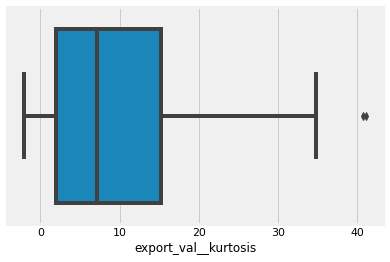

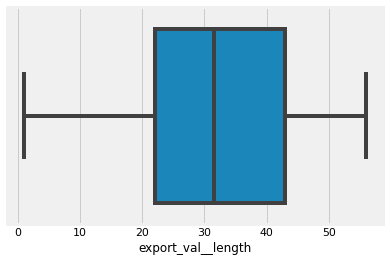

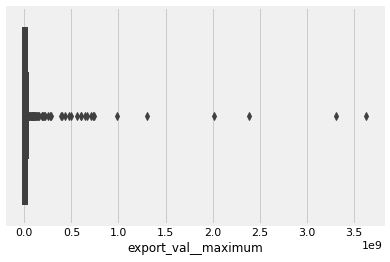

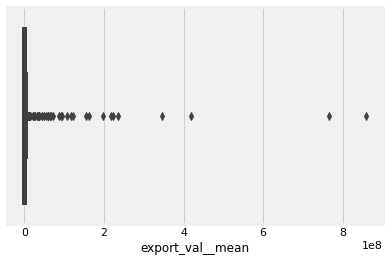

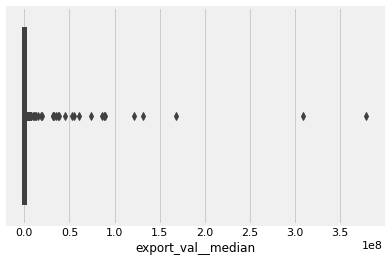

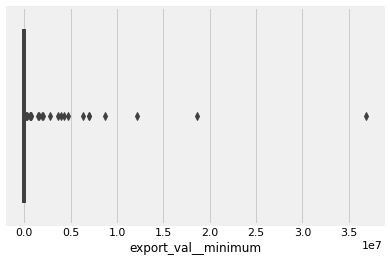

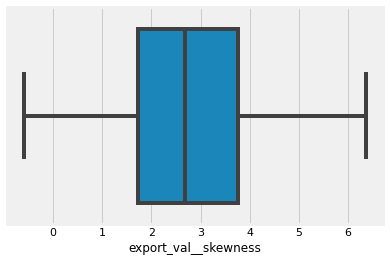

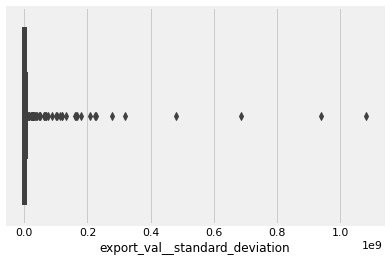

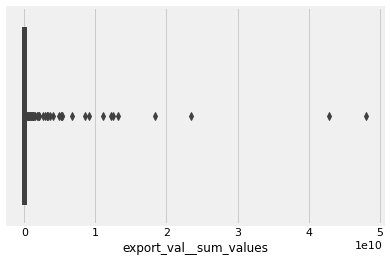

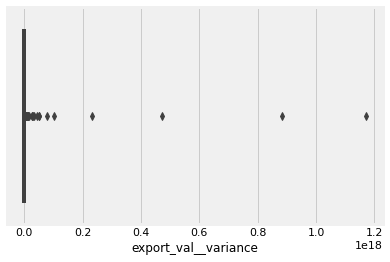

In [13]:
for col in cols:
  sns.boxplot(engines[col])
  plt.show()

In [14]:
X.plot(figsize=(14,7),subplots=True)
plt.show()

AttributeError: ignored

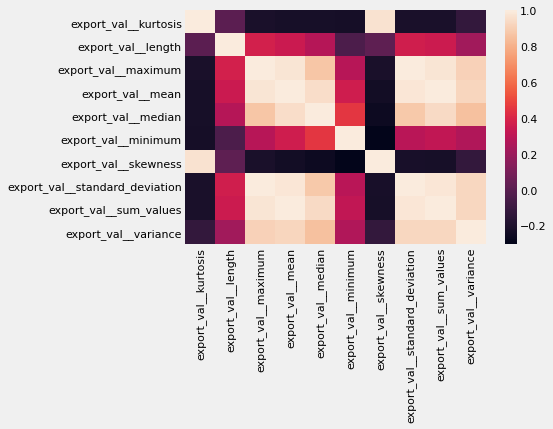

In [27]:
sns.heatmap(engines.corr())

For 2 clusters: average silhouette_score is 0.31126433407011794
For 3 clusters: average silhouette_score is 0.39256194519164406
For 4 clusters: average silhouette_score is 0.4054517672496486
For 5 clusters: average silhouette_score is 0.3679234855390375
For 6 clusters: average silhouette_score is 0.37216641086565516
For 7 clusters: average silhouette_score is 0.3603862820105841
For 8 clusters: average silhouette_score is 0.33139836724264415
For 9 clusters: average silhouette_score is 0.33666055262663686
For 10 clusters: average silhouette_score is 0.3556498889814318
For 11 clusters: average silhouette_score is 0.35151972078409066
For 12 clusters: average silhouette_score is 0.3671302476663495
For 13 clusters: average silhouette_score is 0.36452374067189164
For 14 clusters: average silhouette_score is 0.35891806141214927


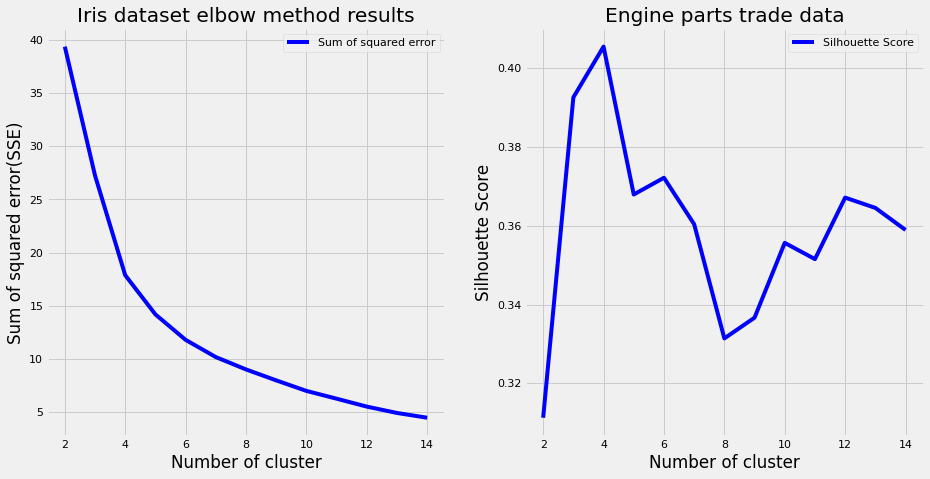

In [29]:
range_n_clusters = range(2,15)
elbow = []
ss = []
for n_clusters in range_n_clusters:
   #iterating through cluster sizes
   clusterer = KMeans(n_clusters = n_clusters, random_state=42,init='k-means++')
   cluster_labels = clusterer.fit_predict(X)
   #Finding the average silhouette score
   silhouette_avg = silhouette_score(X, cluster_labels)
   ss.append(silhouette_avg)
   print(f"For {n_clusters} clusters: average silhouette_score is {silhouette_avg}")
   #Finding the average SSE"
   elbow.append(clusterer.inertia_) # Inertia: Sum of distances of samples to their closest cluster center

fig = plt.figure(figsize=(14,7))

fig.add_subplot(121)
plt.title("Iris dataset elbow method results")
plt.plot(range_n_clusters, elbow,'b-',label='Sum of squared error')
plt.xlabel("Number of cluster")
plt.ylabel("Sum of squared error(SSE)")
plt.legend()

fig.add_subplot(122)
plt.title("Engine parts trade data")
plt.plot(range_n_clusters, ss,'b-',label='Silhouette Score')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

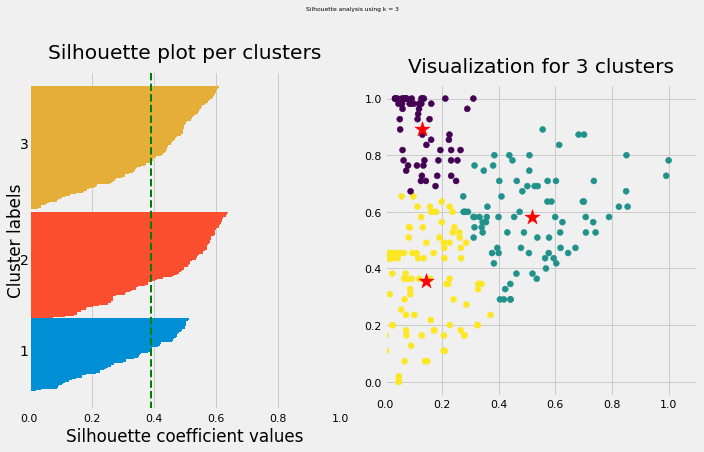

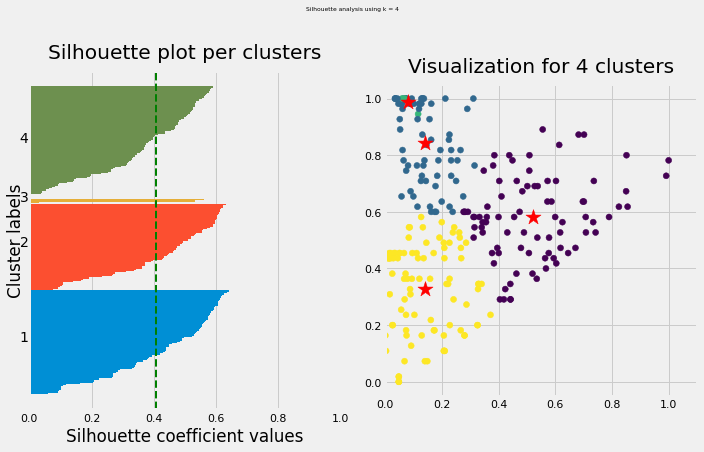

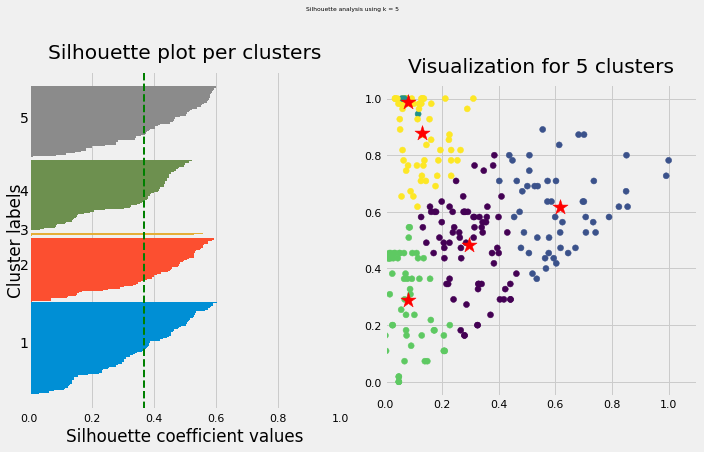

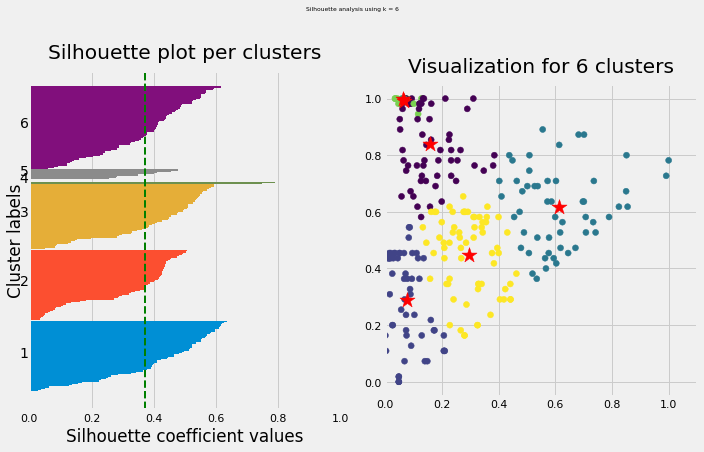

In [30]:
for i, k in enumerate([3,4,5,6]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 6)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k,random_state=42,init='k-means++')
    labels = km.fit_predict(X)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([0, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot per clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X[:, 0], X[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([0, 1.1])
    ax2.set_xlim([0, 1.1])
    # ax2.set_xlabel('Features values (standardised scale)')
    # ax2.set_ylabel('Features values (standardised scale')
    ax2.set_title(f'Visualization for {k} clusters', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=6, y=1.05);

In [0]:
# estimators = [
#               ('k_means_6', KMeans(n_clusters=6,random_state=42)),
#               ('k_means_3', KMeans(n_clusters=3,random_state=42))
#               ]
# fignum = 1
# titles = ['6 clusters', '4 clusters']
# for name, est in estimators:
#     fig = plt.figure(fignum, figsize=(4, 3))
#     ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
#     est.fit(X)
#     labels = est.labels_

#     ax.scatter(X[:, 3], X[:, 0], X[:, 2],
#                c=labels.astype(np.float), edgecolor='k')

#     ax.w_xaxis.set_ticklabels([])
#     ax.w_yaxis.set_ticklabels([])
#     ax.w_zaxis.set_ticklabels([])
#     ax.set_xlabel('Cluster 1')
#     ax.set_ylabel('Cluster 2')
#     ax.set_zlabel('Cluster 3')
#     ax.set_title(titles[fignum - 1])
#     ax.dist = 12
#     fignum = fignum + 1

In [0]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4,n_init=1,init='random',n_jobs = 4, max_iter=10000, random_state=21,algorithm="auto")
fitted_model = model.fit(X)
labels = model.labels_
centroids = pd.DataFrame(fitted_model.cluster_centers_)
print(f'Cluster centers: \n {centroids}')

In [0]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [0]:
# setting distance_threshold=0 ensures we compute the full tree.
hc_model = AgglomerativeClustering(distance_threshold=6, n_clusters=None,linkage='ward')

hc_model = model.fit(X)
plt.title('Country clusters for Engines export values from 1960 to 2017')
# plot the top three levels of the dendrogram
plot_dendrogram(hc_model, truncate_mode='level', p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [0]:
# scaler = MinMaxScaler()
# engines_scaled = scaler.fit_transform(engines.index.values)
eng_feat_vals = preprocessing.scale(data)
clusters = AgglomerativeClustering(n_clusters=50,linkage='ward')
# clusters.fit(eng_feat_vals)
# engines['eng_labels'] = clusters.fit_predict()